# **USED CAR PREDICTION**

### **Context:**

 - Why is this problem important to solve?
 
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in there cent past, the pre-owned car market has continued to grow over the past few years and is now larger than the new car market. Cars4U is a budding tech start-up that aims to find foot holes in this market. In 2018-19, while new car sales were recorded at 3.6 million units, around 4million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. Infact, some car owners replace their old vehicles with pre-owned cars instead of buying a new automobile. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer/except for dealership level discounts which come into play only in the last stage of the customer journey), the used car market is a very different beast, with large uncertainties in both pricing and supply. **Several factors, including mileage, brand, model, year, etc. can influence the actual worth of a car.** From the perspective of a seller, it is not an easy task to set the correct price of a used car. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

### **The objective:**

 - What is the intended goal?
 

Due to the unprecedented number of cars being purchased and sold, used car price prediction is a topic of high interest. Because of the affordability of used cars in developing countries, people tend more purchase used cars. A primary objective of this project is to estimate used car prices by using attributes that are highly correlated with a label (Price). Come up with a pricing model that can **effectively predict the price of used cars** and can help the business in devising profitable strategies using differential pricing.

### **The key questions:**

- What are the key questions that need to be answered?

**1. Why are they selling the car?**

**2. How old is the car?**

**3. What’s the car’s mileage?**

**4. How long have they owned the car?**

**5. What is the Brand and Model of the car?**

**6. What is the engine and power of the car?**

### **The problem formulation**:

- What is it that we are trying to solve using data science?

Predict the price of cars in the Indian market

Predictions will be based on vehicle features such as **power, engine, name, Location, age, make, model, mileage**

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

### **Loading libraries**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


import pandas as pd


#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from statsmodels.graphics.gofplots import ProbPlot
# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler


from tqdm import tqdm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline





# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [2]:
data = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [3]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
# View last 5 rows Hint: Use tail() method
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights: _____**

There are both numerical and catogorical variables in the dataset as such the ccategorical variables will have to be encoded.
There are missing values in the new_price and price columns
The name column contains data that may be able to be separated into different columns eg. "Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan" contains year, brand name an model which may or may not be relevant
Serial No. Also may not be neccesary as is is too unique and maybe dropped later
We also see both categorical and numerical variables which may influence the methods we use

### **Let us check the data types and and missing values of each column** 

In [5]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [6]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights: _____**
Both categorical and numerical data can be seen. We will need to come up with ways to address the missing values as well, however al missing values appear to be numerical which will have tto be addressed by some statistical means (mean, meadian, ect). The missing data seems minial compared to the number of rows in the dataset and a large missing value within the target variable is as expected

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [7]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(columns = ["S.No."], inplace = True)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [8]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


**Observations and Insights: _____**

**The average year seems to be at 2013**
**Mileage minimum is at 0 which means that there is either outliers or incorrect data** 

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [9]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object'] 
cat_df = data.select_dtypes(include=['object'])

cat_df.describe().T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Number of unique observations in each category**

In [10]:
cat_df.nunique()

Name            2041
Location          11
Fuel_Type          5
Transmission       2
Owner_Type         4
dtype: int64

In [11]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].value_counts())
    
    print('-'*50)

For column: Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
For column: Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
For column: Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Typ

#### **Observations and Insights: _____**

- most cars use either desisel or petrol
- the least amount of cars are being soled in Ahmedabad
- Most cars are manual transmission
- Mahindra seems to be the top brand

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [12]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values(by='Kilometers_Driven', ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: _____**


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [13]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop([0, 2328],inplace = True)
data.sort_values(by='Kilometers_Driven', ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.40,2499.0,134.00,5.0,NaN,NaN


**Check Mileage extreme values**

In [14]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values('Mileage').tail(50)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
892,Maruti Swift ZDI,Delhi,2012,52000,Diesel,Manual,First,28.40,1248.0,74.00,5.0,NaN,3.55
879,Maruti Swift DDiS ZDI Plus,Hyderabad,2018,5456,Diesel,Manual,First,28.40,1248.0,74.00,5.0,NaN,8.65
3239,Maruti Dzire ZDI,Ahmedabad,2013,56454,Diesel,Manual,First,28.40,1248.0,73.75,5.0,8.95,4.65
5086,Maruti Dzire VDI,Hyderabad,2013,68434,Diesel,Manual,First,28.40,1248.0,73.75,5.0,9.14,5.50
3524,Maruti Swift VDI,Jaipur,2015,63310,Diesel,Manual,First,28.40,1248.0,74.00,5.0,8.13,5.10
1301,Maruti Swift LDI,Mumbai,2015,14000,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.13,5.25
1519,Maruti Dzire AMT ZDI Plus,Hyderabad,2017,28226,Diesel,Automatic,First,28.40,1248.0,73.75,5.0,11.52,9.15
3889,Maruti Dzire VDI,Jaipur,2013,77084,Diesel,Manual,First,28.40,1248.0,73.75,5.0,8.75,4.95
3012,Maruti Swift LDI,Hyderabad,2016,52000,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.27,5.95
6393,Maruti Swift VDI,Hyderabad,2013,99000,Diesel,Manual,First,28.40,1248.0,74.00,5.0,8.44,NaN


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [15]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

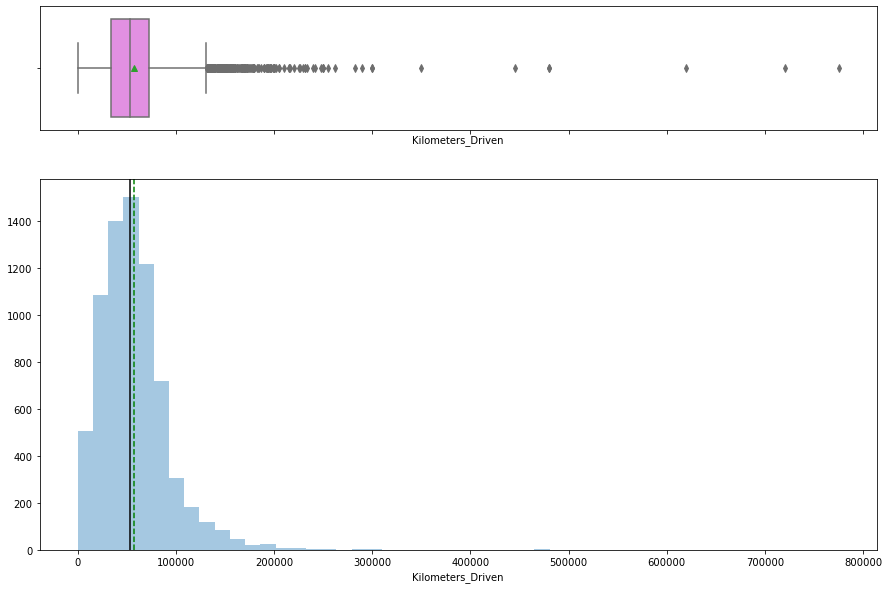

In [16]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

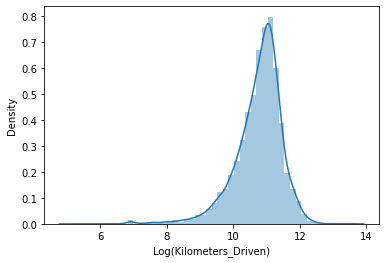

In [17]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights: _____**

Kilometers_driven is not normally distributed, it is right skewed. To solve this problem, the log transformation on kilometers_driven is applied when it has skewed distribution

In [18]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

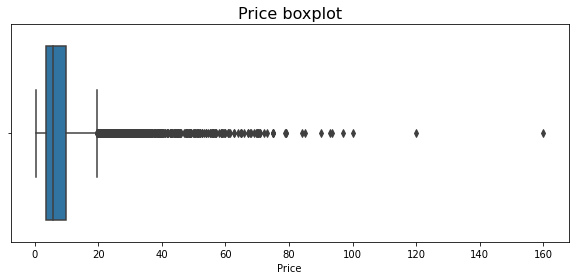

In [19]:
# Plot histogram and box-plot for 'Price'

plt.figure(figsize = (10, 4))

sns.boxplot(data['Price'])

plt.title('Price boxplot', size = 16)

plt.show()

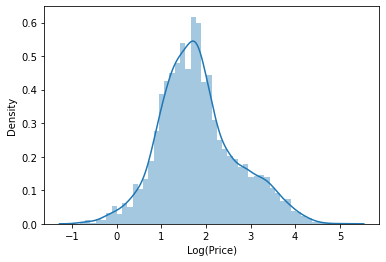

In [20]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)");

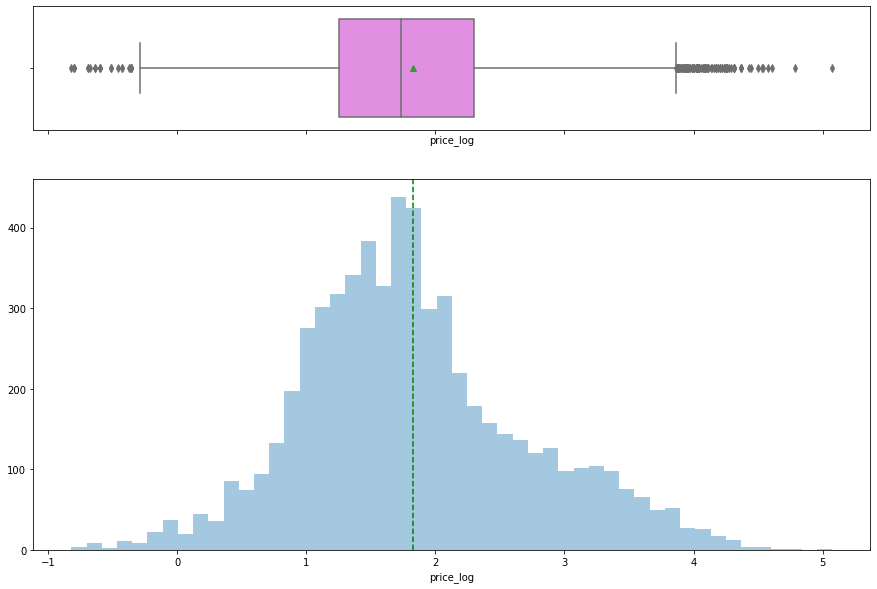

In [21]:
# We can Add a transformed Price feature in data
data["price_log"] = np.log(data["Price"])

histogram_boxplot(data['price_log'])

**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

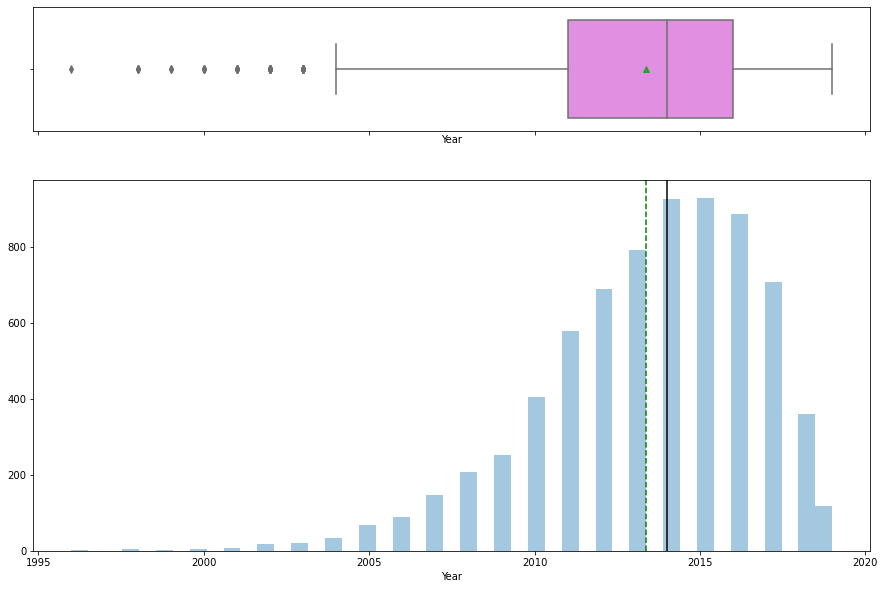

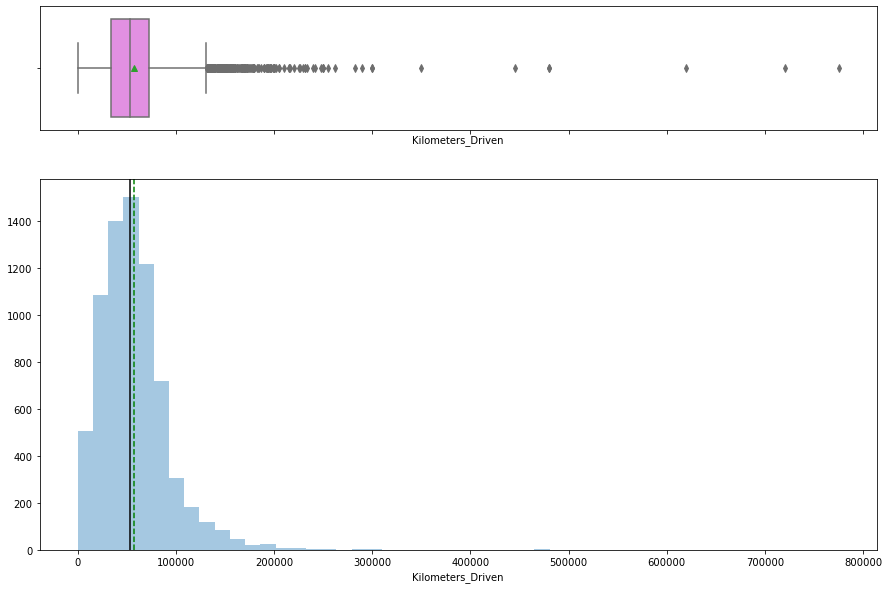

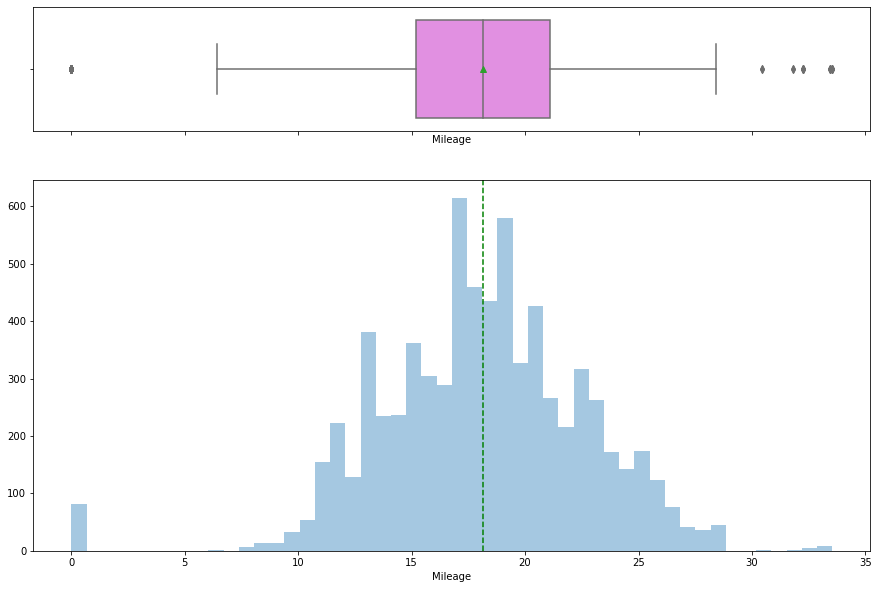

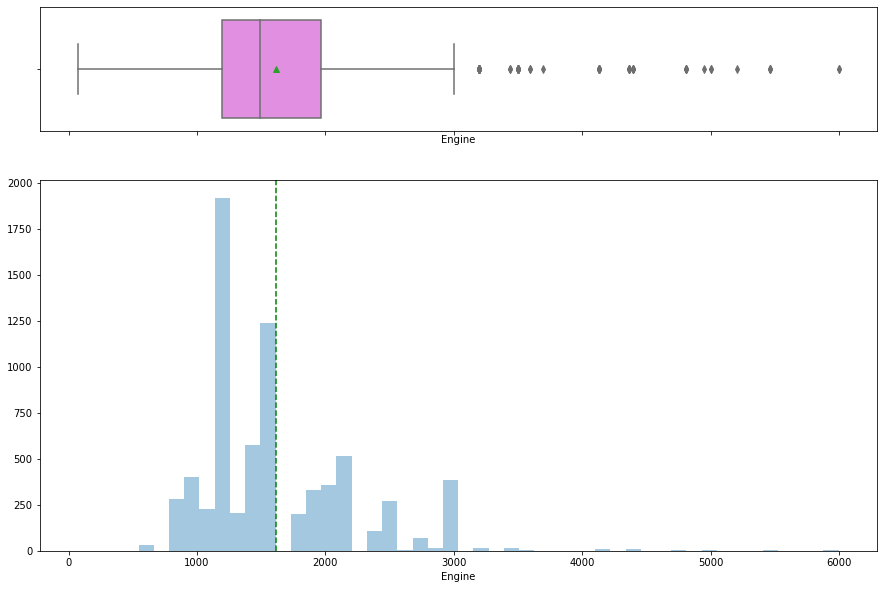

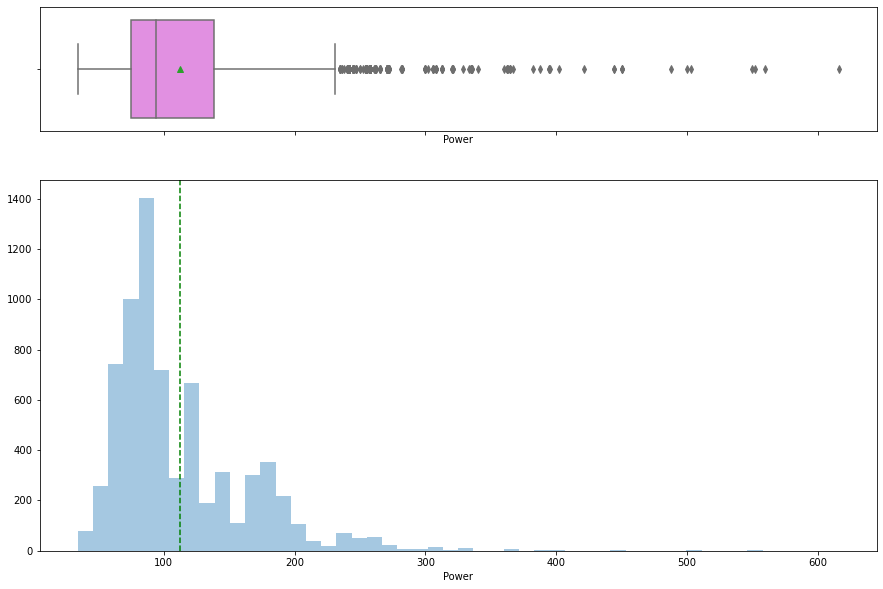

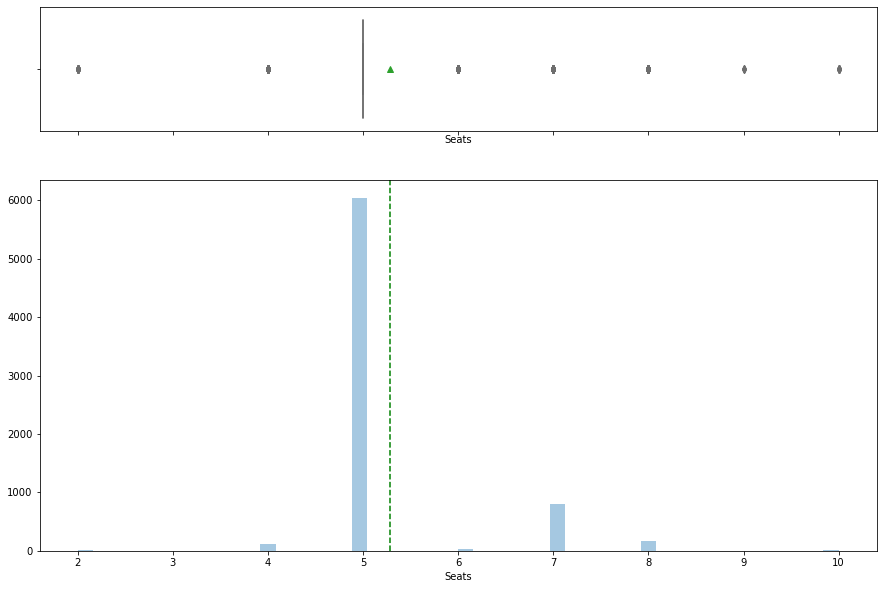

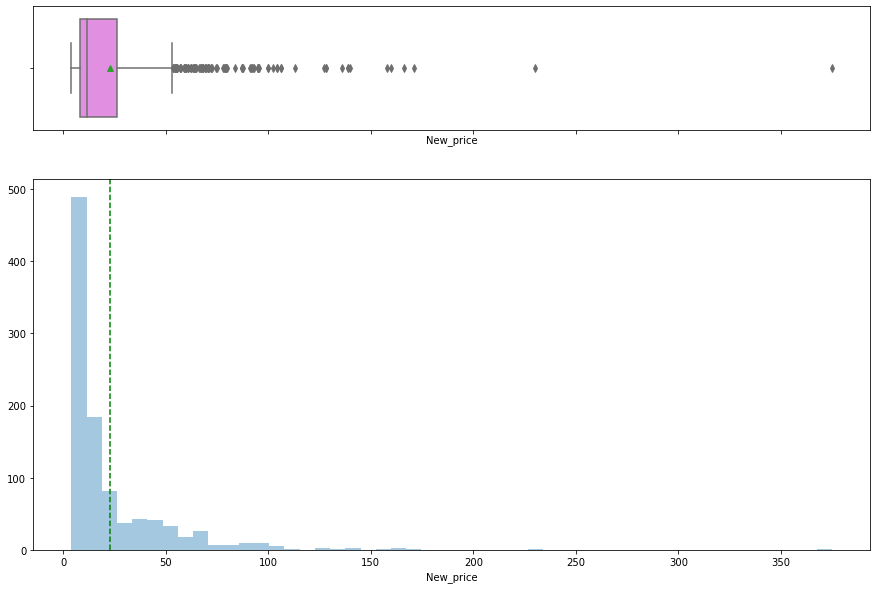

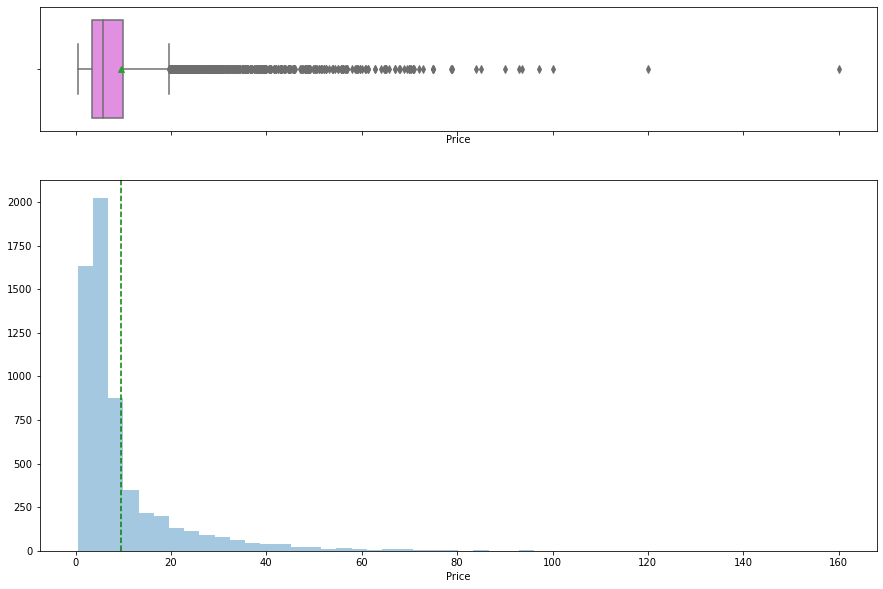

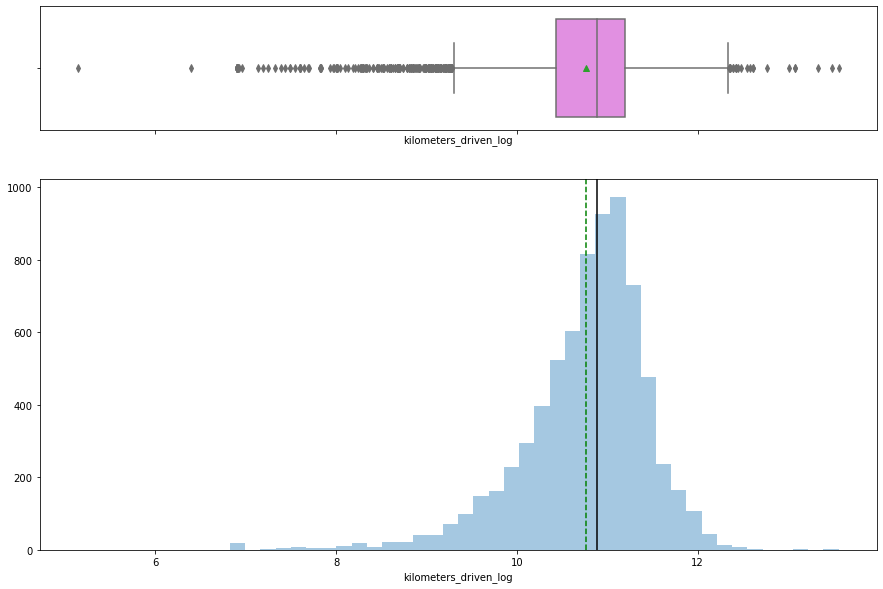

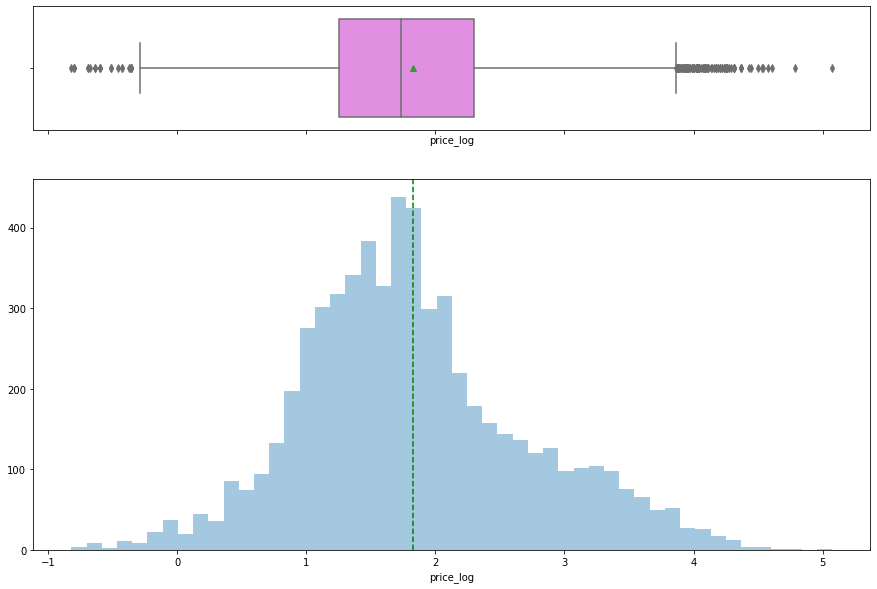

In [22]:
result = data.select_dtypes(include = 'number')

cont_cols = list(result)

for col in cont_cols:
    
    histogram_boxplot(data[col])


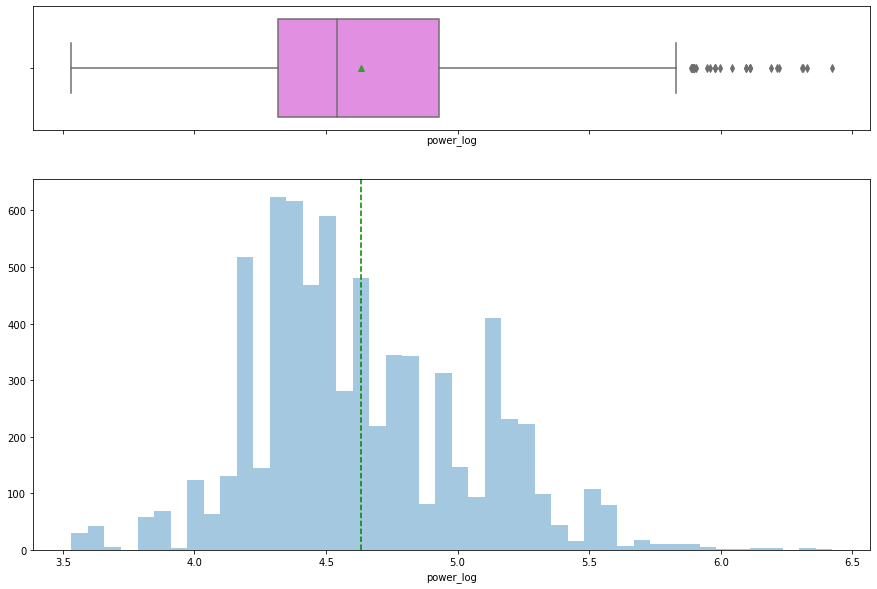

In [23]:
# We can Add a transformed Price feature in data
data["power_log"] = np.log(data["Power"])

histogram_boxplot(data['power_log'])

**Observations and Insights for all the plots: _____**

Kilometers_driven is not normally distributed, it is right skewed. To solve this problem, the log transformation on kilometers_driven is applied when it has skewed distribution. And add the transformed variable into the dataset. You can name the variable as ' kilometers_driven_log'.

Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as 'price_log'.

Like Kilometers_Driven, the distribution of Power is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as 'power_log'.


## **2. Univariate analysis - Categorical Data**

In [24]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

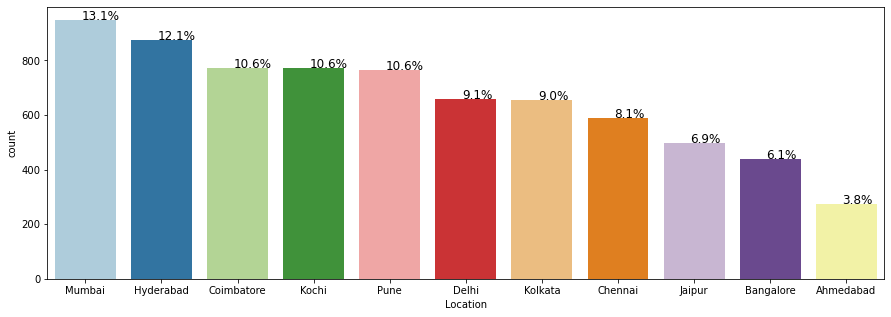

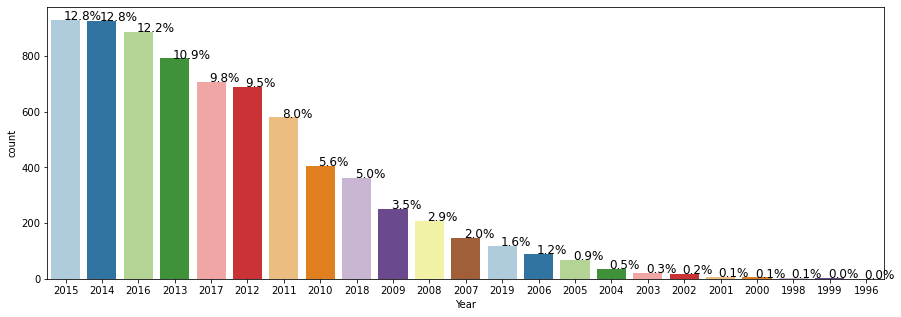

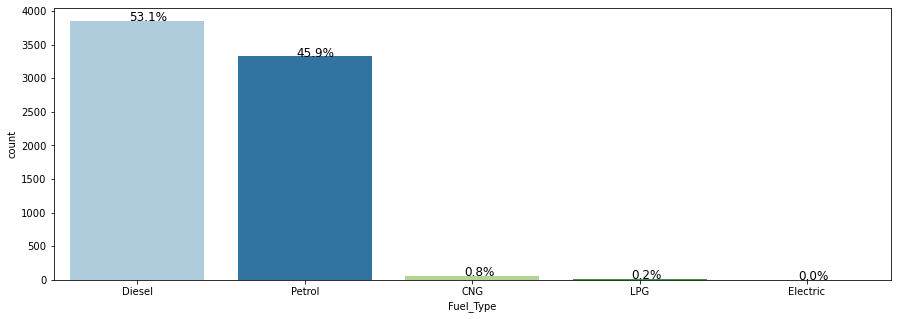

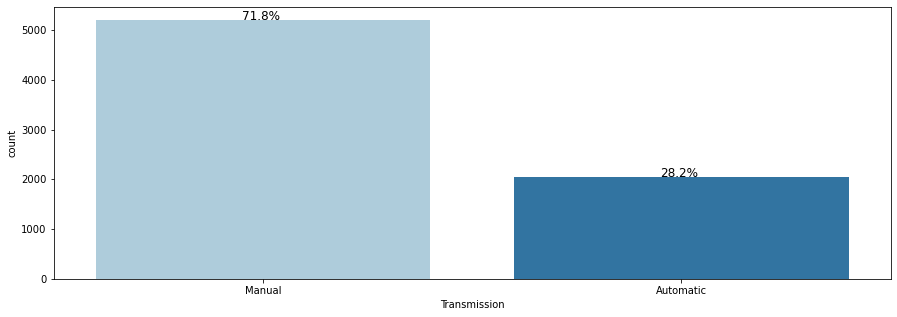

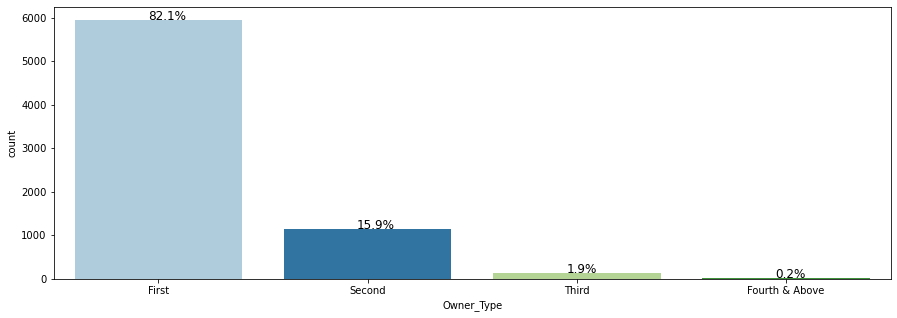

In [25]:
# Bar Plot for 'Location'
perc_on_bar('Location')

# Bar Plot for 'Year'
perc_on_bar('Year')

# Bar Plot for 'Fuel Type'
perc_on_bar('Fuel_Type')

# Bar Plot for 'Transmission'
perc_on_bar('Transmission')

# Bar Plot for 'Owner Type'
perc_on_bar('Owner_Type')


**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

**Observations and Insights from all plots: _____**

- Most of the owners withing this dat aset are first-time owners
- Most cars are manual transmission cars
- Diesel and Pertol is the predominant fuel type
- Most care in the data set are "newer" cars (2011 - 2015)

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='price_log'>

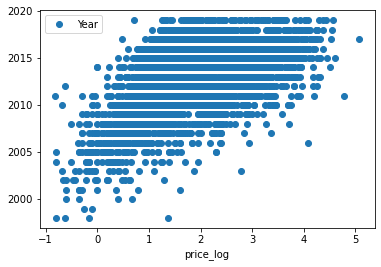

In [26]:
# Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'price_log', y = 'Year', style = 'o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

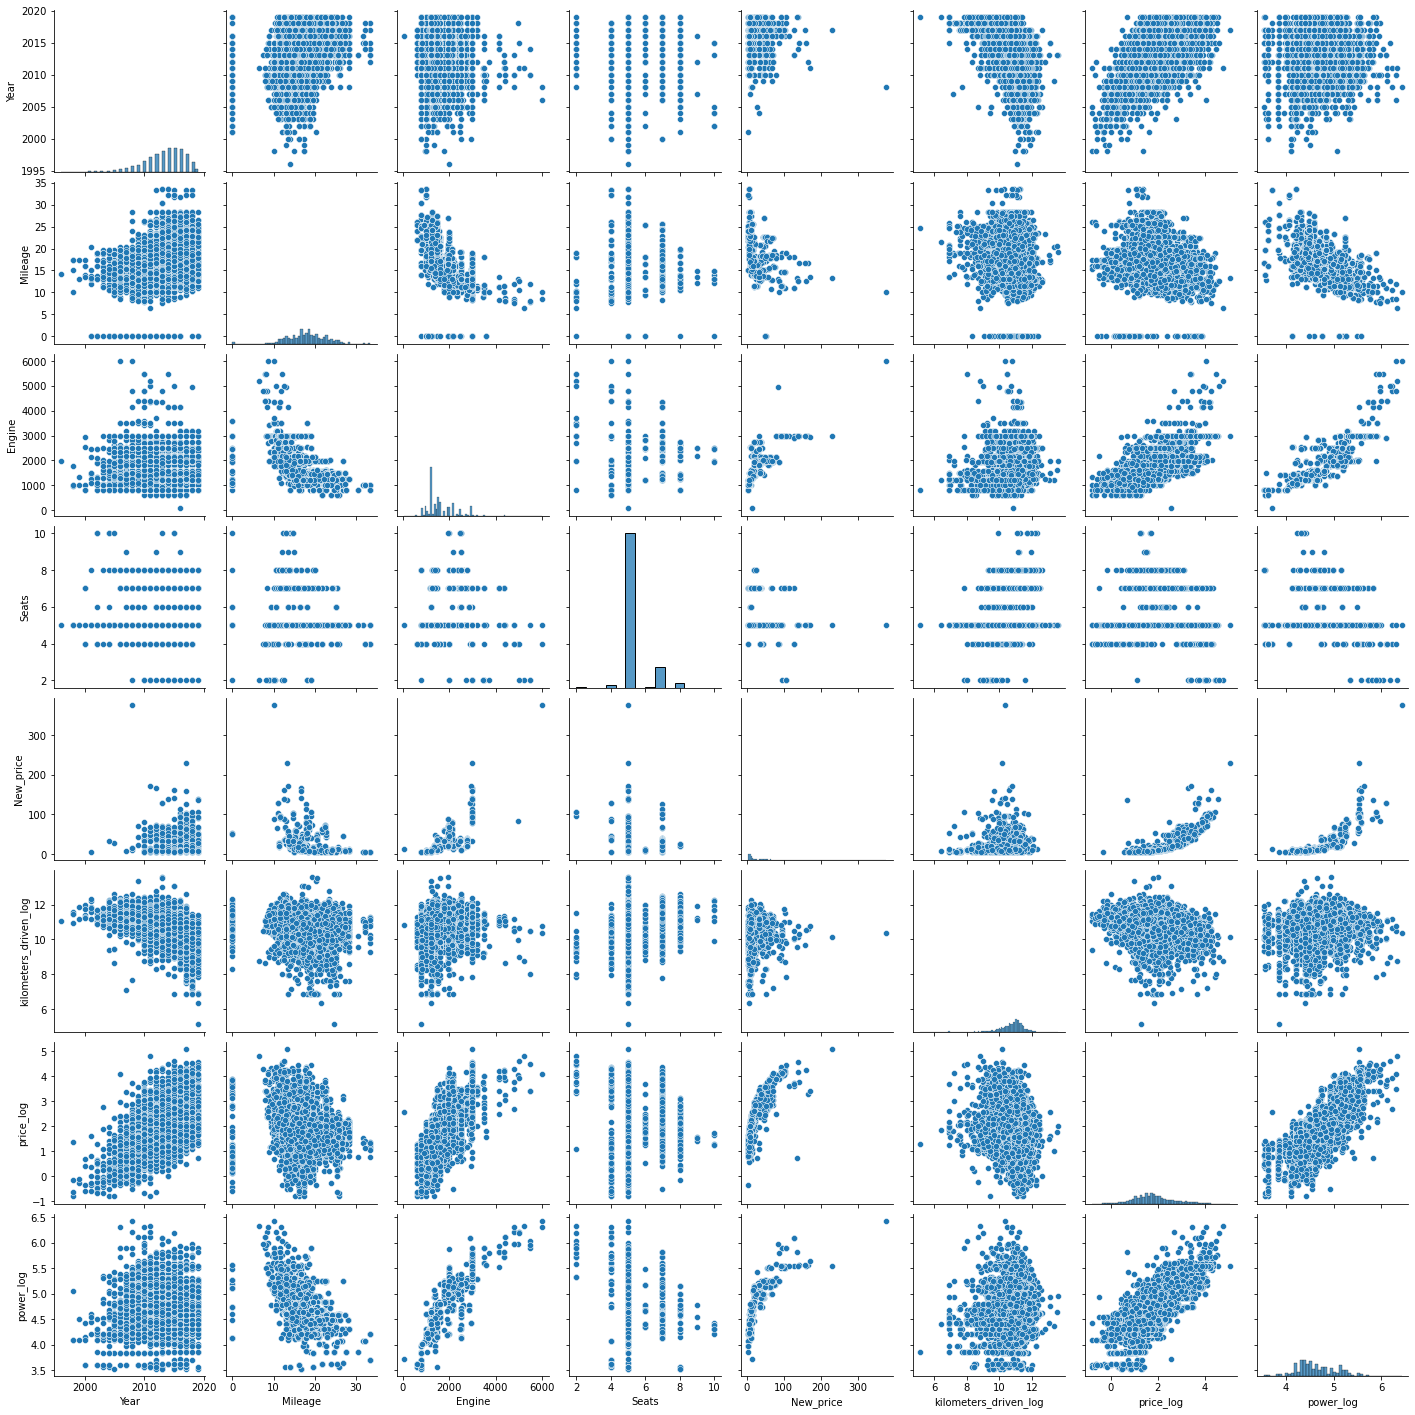

In [27]:
# pairplot
sns.pairplot(data.drop(['Price', 'Kilometers_Driven', 'Power'],axis = 1))
plt.show()

**Observations and Insights from all plots: _____**

Positive relationships: 
- price_log ---> year
- power ---> engine
- price_log --- > power_log

### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

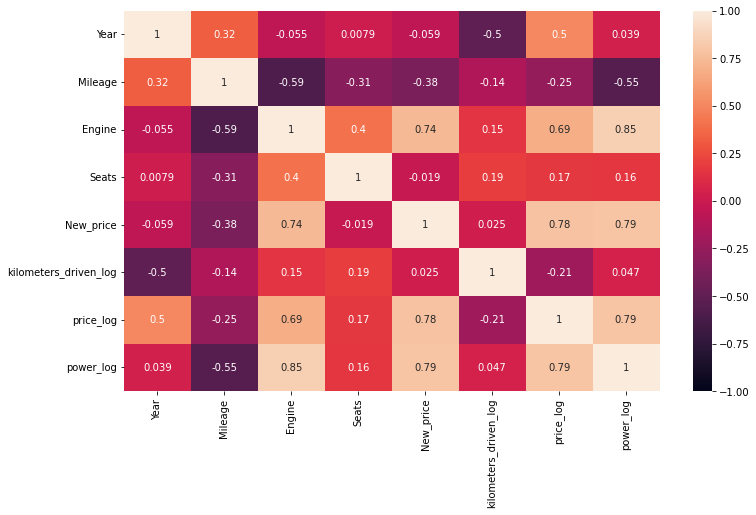

In [28]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(['Price', 'Kilometers_Driven', 'Power'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

**Observations and Insights: _____**

Positive relationships: 
- price_log ---> year
- power ---> engine

### **3. Box plot**

In [29]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

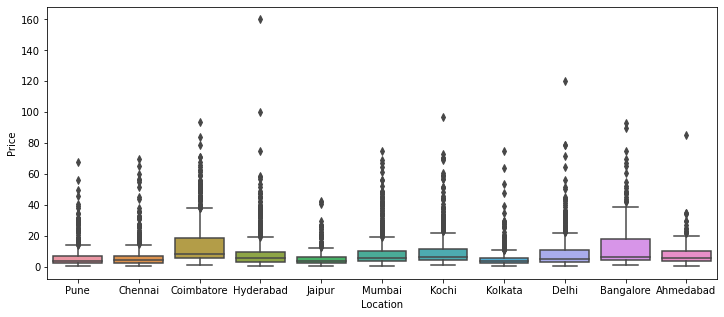

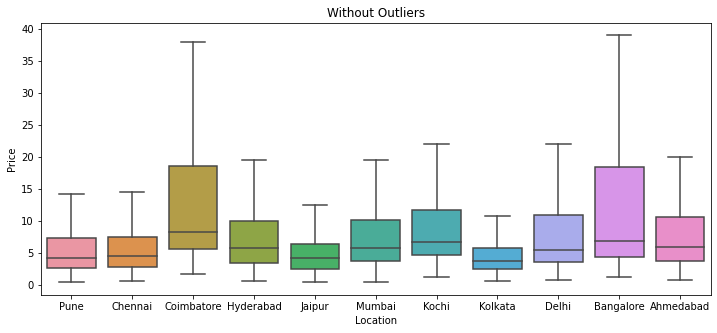

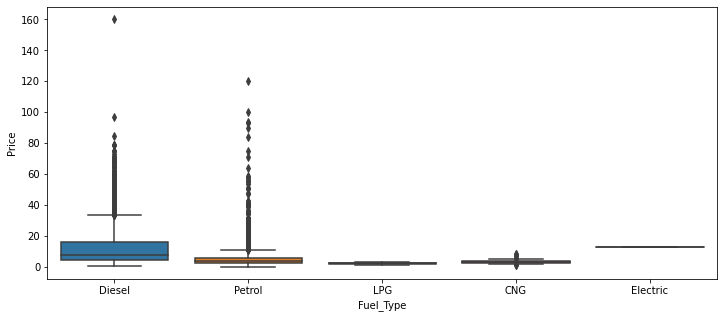

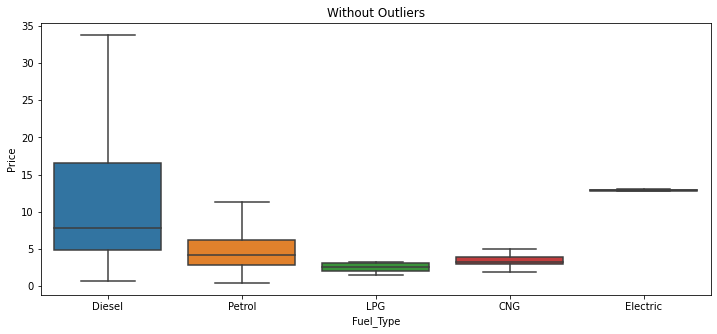

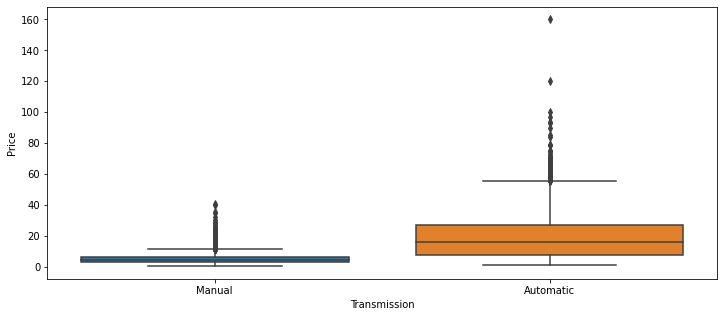

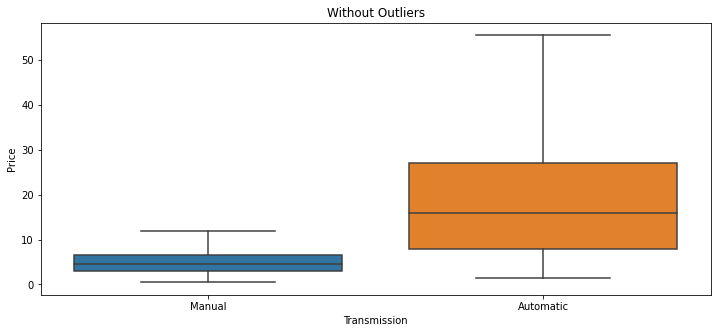

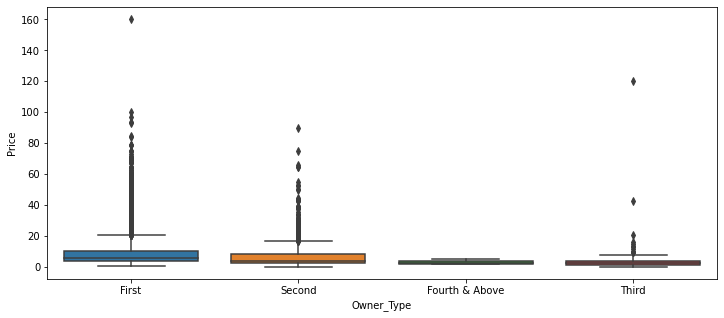

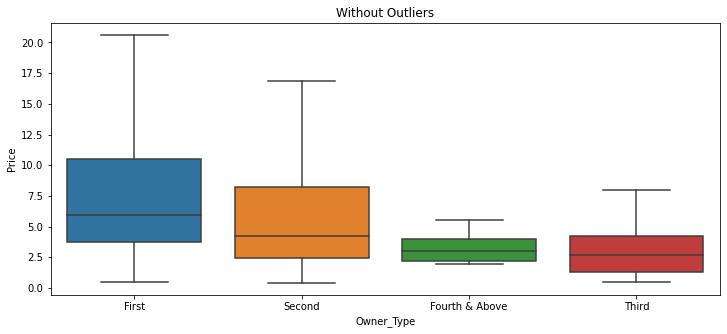

In [30]:
# Box Plot: Price vs Location
boxplot(data['Location'])

# Box Plot: Price vs Fuel_Type
boxplot(data['Fuel_Type'])

# Box Plot: Price vs Transmission
boxplot(data['Transmission'])

# Box Plot: Price vs Owner_Type
boxplot(data['Owner_Type'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

**Observations and Insights for all plots:__**
- Coibatore and Bangladore have on average the most expensive car prices
- Diesel cars on average are the most expensive, electic cars although expensive are not significant in the data set
- Automatic cars are the most expensive
- cars with only one previous owner are the most expensive

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

#### **Observations and Insights: _____**

Feature engineering seeks to address the features that will influence the target variable (price). These variables need to be exploered

### **Missing value treatment**

In [31]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6245
Price                    1234
kilometers_driven_log       0
price_log                1234
power_log                 175
dtype: int64

#### **Observations and Insights: _____**

The following Varables have missing values

Mileage                     2

Engine                     46

Power                     175

Seats                      53

New_price                6245

Price                    1234

**Missing values in Seats**

In [32]:
# Checking missing values in the column 'Seats'
data['Seats'].isnull().sum()

53

**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [33]:
# median number of seats for the particular car, using the Brand and Model name.

data["Brand"] = data['Name'].str.split(' ').str[0]
data["Model"] = data['Name'].str.split(' ').str[1]

# replace values that may be still be dirty as stated earlier
data['Model'] = data['Model'].replace({'3':'3 series'})
data['Model'] = data['Model'].replace({'5':'5 series'})
data['Model'] = data['Model'].replace({'6':'6 series'})
data['Model'] = data['Model'].replace({'1':'1 series'})
data['Model'] = data['Model'].replace({'7':'7 series'})
data['Model'] = data['Model'].replace({'800':'800 AC'})
data.loc[data['Model'] == 'Rover', 'Model'] = data['Name'].str.split(' ').str[2]
data.loc[data['Model'] == 'New', 'Model'] = data['Name'].str.split(' ').str[2]
data['Brand'] = data['Brand'].replace({'Land':'Land Rover'})
data.loc[data.Brand == 'ISUZU','Brand']='Isuzu'
data.loc[data.Brand == 'Mini','Brand']='Mini Cooper'

# Impute missing values in Seats one by one by using the median number of seats for the particular car, using Brand and Model

data['Seats']=data.groupby(['Brand','Model'])['Seats'].apply(lambda x:x.fillna(x.median()))


In [34]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull()method
data['Seats'].isnull().sum()

3

**Missing values for Mileage**

In [35]:
# Now check missing values of each column. Hint: Use isnull() method
data['Mileage'].isnull().sum()

2

In [36]:
#Replace values of 0 to nan
data['Mileage'].replace(0,np.nan,inplace=True)

# Impute missing Mileage. For example, use can use median or any other methods.
data['Mileage']=data.groupby(['Brand','Model'])['Mileage'].apply(lambda x:x.fillna(x.median()))

In [37]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data['Mileage'].isnull().sum()

6

**Missing values for Engine**

In [38]:
data['Engine'].isnull().sum()

46

In [39]:
data['Engine']=data.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))
data['Engine'].isnull().sum()

0

**Missing values for Power**

In [40]:
data['Power'].isnull().sum()

175

In [41]:
data['Power']=data.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))
data['Power'].isnull().sum()

12

In [42]:
data.Power.fillna(data.Power.median(), inplace = True)
data['Power'].isnull().sum()

0

**Missing values for New_price**

In [43]:
data['New_price'].isnull().sum()

6245

In [44]:
# lots of missing values, hence dropping also is not a factor is predicting the price or new cars
data.drop(columns='New_price', inplace=True)

# using Brand and Model, hence dropping name
data.drop(columns='Name', inplace=True)

# Age rather than Year 
import datetime
curr_time = datetime.datetime.now()
data['Age'] = data['Year'].apply(lambda x : curr_time.year - x)

# using Age
data.drop(columns='Year', inplace=True)


# Fill Nan values for price, and reimpute Price_log and power_log
data['Price']=data.groupby(['Brand','Model'])['Price'].apply(lambda x:x.fillna(x.median()))
data.drop(columns='price_log', inplace=True)
data["price_log"] = np.log(data["Price"])
data.drop(columns='power_log', inplace=True)
data["power_log"] = np.log(data["Power"])

# drop the subset of data since these values are minnimal
data.dropna(subset=['Price', 'Mileage', 'Seats'], inplace=True)

**Observations for missing values after imputing: _____**

**Missing values in Seats**

extracted information from 'Name' column to impute missing values

Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.

**Missing values for Mileage**

replace zero to NAN as stated earlier

Impute missing Mileage. using median

**Missing values for Engine**

Impute these missing values one by one, by taking median number of engine for the particular car, using the Brand and Model name.

**Missing values for Power**

Impute these missing values one by one, by taking median number of power for the particular car, using the Brand and Model name.

**Missing values for New_price**

column dropped

**Added the column age**

Age based on current Year hence dropped Year column


## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?
- **Overall solution design -** What is the potential solution design?
- **Measures of success -** What are the key measures of success?

### **Saving the Data**

Please save the pre-processed dataset into a separate file so that we can continue without having to repeat the work we did in Milestone1. The stored data frame can be loaded into Milestone2 and implemented further.

To save the pre-processed data frame, please follow the below lines of code:

In [45]:
# Assume df_cleaned is the pre-processed data frame in your code, then
cars_data = data.copy()

# Now check the missing values of each column.
cars_data.isnull().sum()

Location                 0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Price                    0
kilometers_driven_log    0
Brand                    0
Model                    0
Age                      0
price_log                0
power_log                0
dtype: int64

**Observation on missing values____** 

New_Price, Price and Price_log is missing values as expected, Power_log is missing values as the log transformation needs to be done on the price column once again. To be addressed later

In [46]:
#display the first 5 values

cars_data.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,kilometers_driven_log,Brand,Model,Age,price_log,power_log
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,10.621327,Hyundai,Creta,7,2.525729,4.837868
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10.736397,Honda,Jazz,11,1.504077,4.485260
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11.373663,Maruti,Ertiga,10,1.791759,4.485936
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10.613246,Audi,A4,9,2.875822,4.947340
5,Hyderabad,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35,11.225243,Hyundai,EON,10,0.854415,4.010963


The above code helps to save the cleaned/pre-processed dataset into csv file, that can be further loaded into Milestone2.

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

**Note:** Please load the data frame that was saved in Milestone 1 here before separating the data, and then proceed to the next step in Milestone 2.

In [47]:
#define numeric variable and categorical variable to work separatly on them
cat_cols = cars_data.select_dtypes(include = ['object']).columns
num_cols = cars_data.select_dtypes(include = ['number']).columns

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [48]:
# Step-1
#Drop price and nad price_log since on y axis, Kilometers_Driven is already log transformed and so is Power, 
#Model data needs additional insights from a domain expertise stand point

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cars_data["Model"] = labelencoder.fit_transform(cars_data["Model"])
#cars_data = labelencoder.fit_transform(cars_data)

X = cars_data.drop(['Price','price_log','Kilometers_Driven','Power'], axis = 1)
y = cars_data[["price_log","Price"]]


X.head()

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,kilometers_driven_log,Brand,Model,Age,power_log
1,Pune,Diesel,Manual,First,19.67,1582.0,5.0,10.621327,Hyundai,53,7,4.837868
2,Chennai,Petrol,Manual,First,18.20,1199.0,5.0,10.736397,Honda,98,11,4.485260
3,Chennai,Diesel,Manual,First,20.77,1248.0,7.0,11.373663,Maruti,69,10,4.485936
4,Coimbatore,Diesel,Automatic,Second,15.20,1968.0,5.0,10.613246,Audi,10,9,4.947340
5,Hyderabad,LPG,Manual,First,21.10,814.0,5.0,11.225243,Hyundai,61,10,4.010963


In [49]:
# Step-2 label encoder chosen
X = pd.get_dummies(X, drop_first = True)
X.head()

,Mileage,Engine,Seats,kilometers_driven_log,Model,Age,power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini Cooper,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
1,19.67,1582.0,5.0,10.621327,53,7,4.837868,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.20,1199.0,5.0,10.736397,98,11,4.485260,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20.77,1248.0,7.0,11.373663,69,10,4.485936,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15.20,1968.0,5.0,10.613246,10,9,4.947340,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,21.10,814.0,5.0,11.225243,61,10,4.010963,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
X_scaled = scaler.fit_transform(X)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)

X = X_scaled.copy()

X.head()

,Mileage,Engine,Seats,kilometers_driven_log,Model,Age,power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini Cooper,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
1,0.488946,0.178266,0.375,0.650872,0.257282,0.190476,0.467016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.434783,0.106997,0.375,0.664540,0.475728,0.380952,0.340892,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.529477,0.116115,0.625,0.740234,0.334951,0.333333,0.341133,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.324245,0.250093,0.375,0.649912,0.048544,0.285714,0.506173,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.541636,0.035355,0.375,0.722605,0.296117,0.333333,0.171240,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(5064, 52) (2171, 52)
(5064, 2) (2171, 2)


In [52]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>
**5) XGBoost** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [53]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [54]:
# Create a linear regression model
lr = LinearRegression()

In [55]:
# Fit linear regression model
lr.fit(X_train, y_train['price_log']) 

LinearRegression()

In [56]:
# Get score of the model
LR_score = get_model_score(lr)

R-sqaure on training set :  0.8647546167962932
R-square on test set :  0.8978831093462609
RMSE on training set :  4.0175537571800355
RMSE on test set :  3.2959590815087187


**Observations from results: _____**
This is a very poor performing model for this data set

**Important variables of Linear Regression**

Building a model using statsmodels.

In [57]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     992.6
Date:                Fri, 12 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:05:05   Log-Likelihood:                -273.98
No. Observations:                5064   AIC:                             654.0
Df Residuals:                    5011   BIC:                             1000.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data. High is ok for regression

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

                      feature         VIF
0                     Mileage   37.178521
1                      Engine   29.889255
2                       Seats   42.708062
3       kilometers_driven_log  111.500563
4                       Model    6.115127
5                         Age    9.123911
6                   power_log   54.155011
7          Location_Bangalore    2.797511
8            Location_Chennai    3.432468
9         Location_Coimbatore    4.344249
10             Location_Delhi    3.615825
11         Location_Hyderabad    4.652355
12            Location_Jaipur    3.108237
13             Location_Kochi    4.248891
14           Location_Kolkata    3.691514
15            Location_Mumbai    4.870895
16              Location_Pune    4.118067
17           Fuel_Type_Diesel   63.226413
18              Fuel_Type_LPG    1.183693
19           Fuel_Type_Petrol   56.518019
20        Transmission_Manual    8.033503
21  Owner_Type_Fourth & Above    1.018793
22          Owner_Type_Second    1

In [59]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [60]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Brand_Hyundai,-0.520957,4.502472e-02
Brand_Renault,-0.525894,4.358866e-02
Brand_Honda,-0.541301,3.750287e-02
Brand_Volkswagen,-0.551980,3.377680e-02
Brand_Ford,-0.560536,3.100295e-02
Brand_Nissan,-0.615122,1.840270e-02
Brand_Isuzu,-0.786422,1.318848e-02
Location_Mumbai,-0.055514,1.254215e-02
Brand_Mahindra,-0.704260,6.816655e-03
Location_Delhi,-0.065124,4.814427e-03


In [61]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
mp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in mp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in cars_data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Brand', 'Location', 'Mileage', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'kilometers_driven_log', 'Engine', 'power_log', 'Age']


**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [62]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge

In [63]:
# Create a Ridge regression model
LaR = Ridge()

In [64]:
# Fit Ridge regression model
LaR.fit(X_train, y_train['price_log'])

Ridge()

In [65]:
# Get score of the model
LR_score = get_model_score(LaR)

R-sqaure on training set :  0.8585140471702845
R-square on test set :  0.8983925148261847
RMSE on training set :  4.109198625204195
RMSE on test set :  3.2877279322623005


**Observations from results: _____**
This model has very poor performance and accuracy

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [66]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [67]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(random_state=1)

In [68]:
# Fit decision tree regression model
dtree.fit(X_train,y_train['price_log'])

DecisionTreeRegressor(random_state=1)

In [69]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.9999632188501091
R-square on test set :  0.8054979865824761
RMSE on training set :  0.06625415561810441
RMSE on test set :  4.548781444917453


**Observations from results: _____**
Decision tree is also a high performing model

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


<AxesSubplot:>

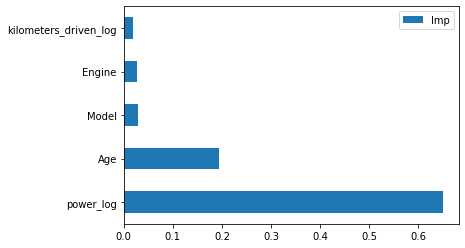

In [70]:
pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head().plot.barh()

In [71]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
power_log                  0.650350
Age                        0.194283
Model                      0.028957
Engine                     0.026034
kilometers_driven_log      0.018280
Mileage                    0.016306
Seats                      0.005714
Brand_Mercedes-Benz        0.005460
Brand_Honda                0.004610
Location_Kolkata           0.004401
Transmission_Manual        0.003454
Brand_Skoda                0.003204
Location_Hyderabad         0.002995
Location_Mumbai            0.002807
Brand_Hyundai              0.002612
Brand_Land Rover           0.002607
Brand_Mini Cooper          0.002397
Owner_Type_Second          0.002220
Location_Coimbatore        0.002118
Location_Delhi             0.002079
Brand_Tata                 0.002048
Brand_Chevrolet            0.001570
Brand_Volkswagen           0.001449
Location_Jaipur            0.001349
Location_Bangalore         0.001328
Brand_Toyota               0.001304
Location_Kochi             0

**Observations and insights: _____**

Power and age seem to be the most influential features for this model

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [72]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [73]:
# Create a Randomforest regression model 
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [74]:
# Fit Randomforest regression model
regr.fit(X_train,y_train['price_log'])

RandomForestRegressor(max_depth=2, random_state=0)

In [75]:
# Get score of the model
rf_model = get_model_score(regr)

R-sqaure on training set :  0.5311487222247306
R-square on test set :  0.5670889797291347
RMSE on training set :  7.480282921204808
RMSE on test set :  6.7862888490673035


**Observations and insights: _____**
A very poor performing model

**Feature Importance**

<AxesSubplot:>

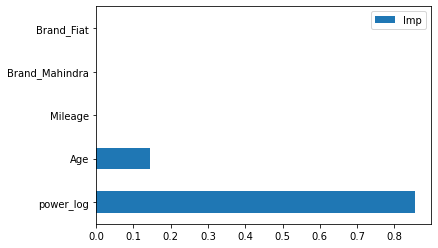

In [76]:
pd.DataFrame(regr.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head().plot.barh()

In [77]:
# Print important features similar to decision trees
print(pd.DataFrame(regr.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
power_log                  0.85508
Age                        0.14492
Mileage                    0.00000
Brand_Mahindra             0.00000
Brand_Fiat                 0.00000
Brand_Force                0.00000
Brand_Ford                 0.00000
Brand_Honda                0.00000
Brand_Hyundai              0.00000
Brand_Isuzu                0.00000
Brand_Jaguar               0.00000
Brand_Jeep                 0.00000
Brand_Lamborghini          0.00000
Brand_Land Rover           0.00000
Brand_Mercedes-Benz        0.00000
Brand_Maruti               0.00000
Brand_Chevrolet            0.00000
Brand_Mini Cooper          0.00000
Brand_Mitsubishi           0.00000
Brand_Nissan               0.00000
Brand_Porsche              0.00000
Brand_Renault              0.00000
Brand_Skoda                0.00000
Brand_Tata                 0.00000
Brand_Toyota               0.00000
Brand_Volkswagen           0.00000
Brand_Datsun               0.00000
Brand_Bentley       

**Observations and insights: _____**
Power_log and Age seem to be the most influential variables on the target price

### **XG BOOST**

In [78]:
# Import xgboost for Regression from sklearn
from xgboost import XGBRegressor

In [79]:
xg_reg = XGBRegressor()

In [80]:
# Fit Randomforest regression model
xg_reg.fit(X_train,y_train['price_log'])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [81]:
# Get score of the model
xg_reg_model = get_model_score(xg_reg)

R-sqaure on training set :  0.984372657185091
R-square on test set :  0.9127432443510946
RMSE on training set :  1.365661423517451
RMSE on test set :  3.046720050743412


**Observations and insights: _____**
Xgboost seems to be the overall best performing model without overfitting

**Feature Importance**

<AxesSubplot:>

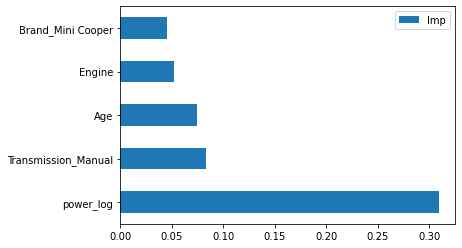

In [82]:
pd.DataFrame(xg_reg.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head().plot.barh()

In [83]:
# Print important features similar to decision trees
print(pd.DataFrame(xg_reg.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
power_log                  0.309781
Transmission_Manual        0.083620
Age                        0.074366
Engine                     0.051841
Brand_Mini Cooper          0.044975
Brand_Honda                0.043326
Brand_Tata                 0.032987
Brand_Mercedes-Benz        0.032680
Fuel_Type_Diesel           0.028883
Brand_Chevrolet            0.027901
Brand_Land Rover           0.027108
Brand_Skoda                0.021934
Brand_Porsche              0.020610
Brand_Volkswagen           0.016085
Brand_Audi                 0.014609
Location_Kolkata           0.014052
Model                      0.011673
Brand_Mahindra             0.011103
Location_Hyderabad         0.009207
Brand_Nissan               0.008008
Brand_Toyota               0.007982
Brand_Hyundai              0.007950
Owner_Type_Third           0.007946
Location_Bangalore         0.007443
Brand_Fiat                 0.007438
Brand_Mitsubishi           0.007396
Location_Coimbatore        0

### **Hyperparameter Tuning: Decision Tree**

In [84]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# For tuning the model
from sklearn.model_selection import GridSearchCV

# Choose the type of regressor. 
dtree_tuned = DecisionTreeRegressor(random_state=1)
 
# Grid of parameters to choose from
parameters = {'max_depth': [None], 
               'criterion': ['squared_error','friedman_mse'],
              'min_samples_leaf': [1, 3, 5, 7],
              'max_leaf_nodes' : [2, 5, 7] + [None],
             }
 
 
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)
 
# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])
 
# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_
 
# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=7,
                      random_state=1)

In [85]:
# Get score of the dtree_tuned
dtree_hyper_model = get_model_score(dtree_tuned)

R-sqaure on training set :  0.886764702924794
R-square on test set :  0.8526674168373612
RMSE on training set :  3.676134427380787
RMSE on test set :  3.9589719234793943


**Observations and insights: _____**
Hyperparameter tunning has significantly influenced the accuracy of the model

**Feature Importance**

<AxesSubplot:>

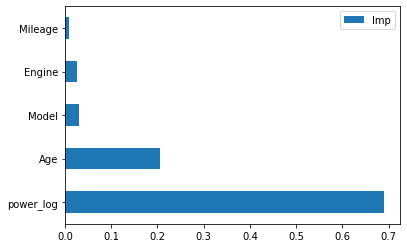

In [86]:
pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head().plot.barh()

In [87]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
power_log                  0.689992
Age                        0.206358
Model                      0.030758
Engine                     0.024768
Mileage                    0.008267
kilometers_driven_log      0.008128
Brand_Mercedes-Benz        0.005594
Transmission_Manual        0.003943
Seats                      0.003924
Location_Kolkata           0.003248
Brand_Honda                0.003218
Brand_Hyundai              0.001855
Location_Hyderabad         0.001272
Brand_Tata                 0.001226
Brand_Toyota               0.000913
Brand_Audi                 0.000896
Location_Coimbatore        0.000660
Brand_Maruti               0.000655
Location_Mumbai            0.000504
Location_Pune              0.000487
Brand_Jeep                 0.000453
Fuel_Type_Petrol           0.000441
Owner_Type_Third           0.000418
Brand_Renault              0.000384
Location_Delhi             0.000358
Owner_Type_Second          0.000240
Location_Kochi             0

**Observations and insights: _____**

The most iport variables to influence proce seem to be power and age

### **Hyperparameter Tuning: Random Forest**

In [88]:
from sklearn.ensemble import RandomForestRegressor


# Choose the type of Regressor
rf_tuned = RandomForestRegressor(random_state = 1)

# Define the parameters for Grid to choose from 
parameters = {'max_depth': [None], 
               'criterion': ['squared_error','friedman_mse'],
              'min_samples_leaf': [1, 3, 5, 7],
              'max_leaf_nodes' : [2, 5, 7] + [None],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)
 
# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])
 
# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_
 
# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train['price_log'])

RandomForestRegressor(criterion='friedman_mse', random_state=1)

In [89]:
# Get score of the model
rf_hyper_model = get_model_score(rf_tuned)

R-sqaure on training set :  0.9738798869623616
R-square on test set :  0.886535097541985
RMSE on training set :  1.7655824295671416
RMSE on test set :  3.474271807416271


**Observations and insights: _____**
Hyper tuning has increated the performance and accuracy of the Random forest model

**Feature Importance**

<AxesSubplot:>

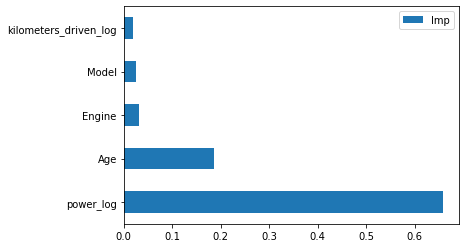

In [90]:
pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head().plot.barh()

In [91]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
power_log                  0.657824
Age                        0.185778
Engine                     0.031367
Model                      0.025303
kilometers_driven_log      0.019702
Mileage                    0.016966
Brand_Honda                0.005196
Brand_Mercedes-Benz        0.004021
Location_Kolkata           0.003826
Brand_Mini Cooper          0.003498
Seats                      0.003434
Transmission_Manual        0.003167
Location_Hyderabad         0.002986
Brand_Tata                 0.002230
Fuel_Type_Diesel           0.002074
Brand_Land Rover           0.002006
Location_Mumbai            0.002004
Location_Coimbatore        0.001965
Brand_Hyundai              0.001851
Brand_Skoda                0.001846
Owner_Type_Second          0.001714
Brand_Volkswagen           0.001656
Brand_Chevrolet            0.001626
Location_Jaipur            0.001500
Location_Delhi             0.001400
Fuel_Type_Petrol           0.001351
Brand_Toyota               0

**Observations and insights: ______**
Most important features that influence the target variable price seems to be power and age

In [92]:
# Defining list of models you have trained
models = [lr, dtree, LaR, regr, xg_reg, dtree_tuned, rf_tuned]


# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

In [93]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree', 'Ridge Regression', 'Random Forest','XG Boost','Dtree Tuned','Random Forest Tuned'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.864755,0.897883,4.017554,3.295959
1,Decision Tree,0.999963,0.805498,0.066254,4.548781
2,Ridge Regression,0.858514,0.898393,4.109199,3.287728
3,Random Forest,0.531149,0.567089,7.480283,6.786289
4,XG Boost,0.984373,0.912743,1.365661,3.046720
5,Dtree Tuned,0.886765,0.852667,3.676134,3.958972
6,Random Forest Tuned,0.973880,0.886535,1.765582,3.474272


**Observations: _____**
XG Boost seems to be the best overall model for accuracy and performance while Random Forest seems to have the worst performance

**Note:** You can also try some other algorithms such as KNN and compare the model performance with the existing ones.

### **Insights**

**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?